# Emulator examples
Let's exemplify how to use the emulator tools.

## Model
Let's define a model to emulate.

In [1]:
import numpy as np

def sine(a=0, b=0):  # named kwargs
    x = np.pi + np.linspace(0., np.pi, 100)
    return {'x': x, 'y': a * x * np.sin(b * x)}  # return "state" dictionary

## Taylor expansion

In [2]:
import os
from cosmoprimo.emulators.tools import Emulator, EmulatedCalculator, TaylorEmulatorEngine, setup_logging


setup_logging()

params = {'a': (0.9, 1.1), 'b': (0.9, 1.1)}  # parameter variation ranges
emulator = Emulator(sine, params, engine=TaylorEmulatorEngine(order={'*': 4}))  # order 4 Taylor expansion
emulator.set_samples()
#print(emulator.samples['y'].attrs)
emulator.fit()

# Let's save the emulator
emulator_dir = '_tests'
fn = os.path.join(emulator_dir, 'emu.npy')
emulator.save(fn)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


[000000.00]  01-07 19:51  Emulator                     INFO     Varied parameters: ['a', 'b'].
[000000.00]  01-07 19:51  Emulator                     INFO     Found varying ['y'] and fixed ['x'] outputs.
[000000.00]  01-07 19:51  DiffSampler                  INFO     a grid is [0.9  0.95 1.   1.05 1.1 ].
[000000.00]  01-07 19:51  DiffSampler                  INFO     b grid is [0.9  0.95 1.   1.05 1.1 ].
[000000.00]  01-07 19:51  DiffSampler                  INFO     Differentiation will evaluate 21 points.
[000000.01]  01-07 19:51  DiffSampler                  INFO     Running for 21 iterations (saving after 20) on 1 rank(s).
[000000.01]  01-07 19:51  DiffSampler                  INFO     Done 10 / 21.
[000000.01]  01-07 19:51  DiffSampler                  INFO     Done 21 / 21.
[000000.01]  01-07 19:51  Emulator                     INFO     Fitting y
[000000.04]  01-07 19:51  Emulator                     INFO     Saving _tests/emu.npy.


In [3]:
# ... and reload it
emulator = EmulatedCalculator.load(fn)
state = emulator(a=1)

[000000.04]  01-07 19:51  Emulator                     INFO     Loading _tests/emu.npy.


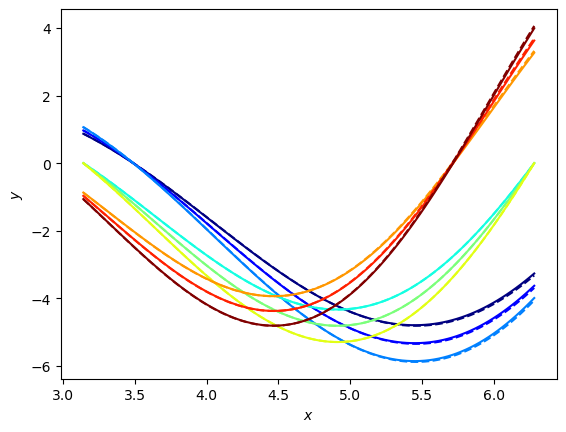

In [4]:
from matplotlib import pyplot as plt

def plot(calculator, emulator, params):
    ax = plt.gca()
    values = np.array(np.meshgrid(*[np.linspace(*limits, 3) for limits in params.values()], indexing='ij')).T.reshape(-1, len(params))
    cmap = plt.get_cmap('jet', len(values))

    for ivalue, value in enumerate(values):
        value = dict(zip(params, value))
        ref = calculator(**value)
        emulated = emulator(**value)
        color = cmap(ivalue / len(values))
        ax.plot(ref['x'], ref['y'], linestyle='--', color=color)
        ax.plot(emulated['x'], emulated['y'], linestyle='-', color=color)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

plot(sine, emulator, params)
plt.show()

## MLP emulator

In [5]:
import os
from cosmoprimo.emulators.tools import Emulator, EmulatedCalculator, MLPEmulatorEngine, ChebyshevOperation, setup_logging

params = {'a': (0.9, 1.1), 'b': (0.9, 1.1)}  # parameter variation ranges
emulator = Emulator(sine, params, engine=MLPEmulatorEngine(nhidden=(10,) * 2, yoperation=ChebyshevOperation(order=10)))
emulator.set_samples()
emulator.fit()

emulator = emulator.to_calculator()

[000000.59]  01-07 19:51  Emulator                     INFO     Varied parameters: ['a', 'b'].
[000000.59]  01-07 19:51  Emulator                     INFO     Found varying ['y'] and fixed ['x'] outputs.
[000000.59]  01-07 19:51  QMCSampler                   INFO     Running for 10000 iterations (saving after 20) on 1 rank(s).
[000000.60]  01-07 19:51  QMCSampler                   INFO     Done 20 / 10000.
[000000.60]  01-07 19:51  QMCSampler                   INFO     Done 40 / 10000.
[000000.60]  01-07 19:51  QMCSampler                   INFO     Done 60 / 10000.
[000000.60]  01-07 19:51  QMCSampler                   INFO     Done 80 / 10000.
[000000.60]  01-07 19:51  QMCSampler                   INFO     Done 100 / 10000.
[000000.60]  01-07 19:51  QMCSampler                   INFO     Done 120 / 10000.
[000000.60]  01-07 19:51  QMCSampler                   INFO     Done 140 / 10000.
[000000.61]  01-07 19:51  QMCSampler                   INFO     Done 160 / 10000.
[000000.61]  01-07 

[000000.74]  01-07 19:51  QMCSampler                   INFO     Done 1940 / 10000.
[000000.74]  01-07 19:51  QMCSampler                   INFO     Done 1960 / 10000.
[000000.74]  01-07 19:51  QMCSampler                   INFO     Done 1980 / 10000.
[000000.74]  01-07 19:51  QMCSampler                   INFO     Done 2000 / 10000.
[000000.74]  01-07 19:51  QMCSampler                   INFO     Done 2020 / 10000.
[000000.74]  01-07 19:51  QMCSampler                   INFO     Done 2040 / 10000.
[000000.75]  01-07 19:51  QMCSampler                   INFO     Done 2060 / 10000.
[000000.75]  01-07 19:51  QMCSampler                   INFO     Done 2080 / 10000.
[000000.75]  01-07 19:51  QMCSampler                   INFO     Done 2100 / 10000.
[000000.75]  01-07 19:51  QMCSampler                   INFO     Done 2120 / 10000.
[000000.75]  01-07 19:51  QMCSampler                   INFO     Done 2140 / 10000.
[000000.75]  01-07 19:51  QMCSampler                   INFO     Done 2160 / 10000.
[000

[000000.94]  01-07 19:51  QMCSampler                   INFO     Done 3920 / 10000.
[000000.94]  01-07 19:51  QMCSampler                   INFO     Done 3940 / 10000.
[000000.95]  01-07 19:51  QMCSampler                   INFO     Done 3960 / 10000.
[000000.95]  01-07 19:51  QMCSampler                   INFO     Done 3980 / 10000.
[000000.95]  01-07 19:51  QMCSampler                   INFO     Done 4000 / 10000.
[000000.96]  01-07 19:51  QMCSampler                   INFO     Done 4020 / 10000.
[000000.96]  01-07 19:51  QMCSampler                   INFO     Done 4040 / 10000.
[000000.96]  01-07 19:51  QMCSampler                   INFO     Done 4060 / 10000.
[000000.96]  01-07 19:51  QMCSampler                   INFO     Done 4080 / 10000.
[000000.97]  01-07 19:51  QMCSampler                   INFO     Done 4100 / 10000.
[000000.97]  01-07 19:51  QMCSampler                   INFO     Done 4120 / 10000.
[000000.97]  01-07 19:51  QMCSampler                   INFO     Done 4140 / 10000.
[000

[000001.30]  01-07 19:51  QMCSampler                   INFO     Done 5900 / 10000.
[000001.30]  01-07 19:51  QMCSampler                   INFO     Done 5920 / 10000.
[000001.30]  01-07 19:51  QMCSampler                   INFO     Done 5940 / 10000.
[000001.30]  01-07 19:51  QMCSampler                   INFO     Done 5960 / 10000.
[000001.31]  01-07 19:51  QMCSampler                   INFO     Done 5980 / 10000.
[000001.31]  01-07 19:51  QMCSampler                   INFO     Done 6000 / 10000.
[000001.32]  01-07 19:51  QMCSampler                   INFO     Done 6020 / 10000.
[000001.32]  01-07 19:51  QMCSampler                   INFO     Done 6040 / 10000.
[000001.32]  01-07 19:51  QMCSampler                   INFO     Done 6060 / 10000.
[000001.33]  01-07 19:51  QMCSampler                   INFO     Done 6080 / 10000.
[000001.33]  01-07 19:51  QMCSampler                   INFO     Done 6100 / 10000.
[000001.33]  01-07 19:51  QMCSampler                   INFO     Done 6120 / 10000.
[000

[000001.67]  01-07 19:51  QMCSampler                   INFO     Done 7880 / 10000.
[000001.68]  01-07 19:51  QMCSampler                   INFO     Done 7900 / 10000.
[000001.68]  01-07 19:51  QMCSampler                   INFO     Done 7920 / 10000.
[000001.68]  01-07 19:51  QMCSampler                   INFO     Done 7940 / 10000.
[000001.69]  01-07 19:51  QMCSampler                   INFO     Done 7960 / 10000.
[000001.69]  01-07 19:51  QMCSampler                   INFO     Done 7980 / 10000.
[000001.70]  01-07 19:51  QMCSampler                   INFO     Done 8000 / 10000.
[000001.70]  01-07 19:51  QMCSampler                   INFO     Done 8020 / 10000.
[000001.70]  01-07 19:51  QMCSampler                   INFO     Done 8040 / 10000.
[000001.71]  01-07 19:51  QMCSampler                   INFO     Done 8060 / 10000.
[000001.71]  01-07 19:51  QMCSampler                   INFO     Done 8080 / 10000.
[000001.72]  01-07 19:51  QMCSampler                   INFO     Done 8100 / 10000.
[000

[000002.13]  01-07 19:51  QMCSampler                   INFO     Done 9860 / 10000.
[000002.14]  01-07 19:51  QMCSampler                   INFO     Done 9880 / 10000.
[000002.14]  01-07 19:51  QMCSampler                   INFO     Done 9900 / 10000.
[000002.15]  01-07 19:51  QMCSampler                   INFO     Done 9920 / 10000.
[000002.15]  01-07 19:51  QMCSampler                   INFO     Done 9940 / 10000.
[000002.16]  01-07 19:51  QMCSampler                   INFO     Done 9960 / 10000.
[000002.16]  01-07 19:51  QMCSampler                   INFO     Done 9980 / 10000.
[000002.16]  01-07 19:51  QMCSampler                   INFO     Done 10000 / 10000.
[000002.17]  01-07 19:51  Emulator                     INFO     Fitting y


2024-01-07 19:51:44.641866: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-07 19:51:44.641897: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-07 19:51:44.642603: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-07 19:51:45.259416: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


[000003.81]  01-07 19:51  numexpr.utils                INFO     NumExpr defaulting to 8 threads.
[000004.02]  01-07 19:51  MLPEmulatorEngine            INFO     Using (batch size, epochs, learning rate) = (1000, 1000, 1.00e-02)
[000030.49]  01-07 19:52  MLPEmulatorEngine            INFO     Using (batch size, epochs, learning rate) = (3000, 1000, 1.00e-03)
[000056.18]  01-07 19:52  MLPEmulatorEngine            INFO     Using (batch size, epochs, learning rate) = (10000, 1000, 1.00e-05)


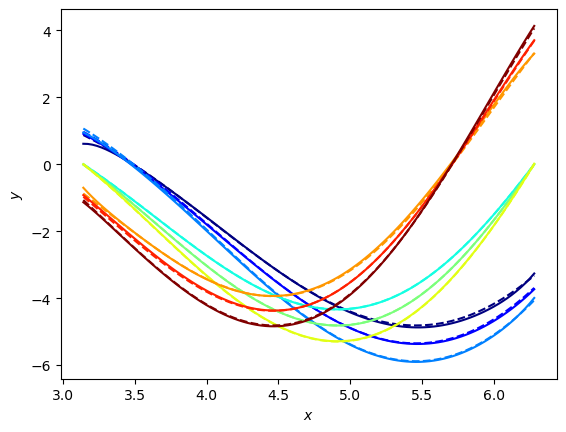

In [6]:
plot(sine, emulator, params)
plt.show()